

# Massive Data Mining and Streaming

## Nowadays, tremendous amount of data was generated from many retail stores had driven the adoption of data science and machine learning in mining these important assets of thecompany to help in gaining insights about their existing customers’ behavior or preferences and further help in finding potential new customers. Given an example of online retail dataset that contains all transactions occurring for an online retail. (Ref: https://archive.ics.uci.edu/ml/datasets/Online+Retail+II The main aim is to generate insights from analyzing the data given that can help the retail store in understanding their customers and benefit their business.

#### Group Members:
<ul>
    <li>Cassandra</li>
    <li>Suhaida</li>
    <li>Huda</li>
    <li>Dongdao</li>
</ul>


### Initialization

#### Import libraries

In [1]:
# libraries for dataframe and visualization
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import datetime as dt
# libraries for clustering
import sklearn
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from scipy.cluster.hierarchy import linkage
from scipy.cluster.hierarchy import dendrogram
from scipy.cluster.hierarchy import cut_tree

#### Load the dataset and save to dataframe

In [2]:
df = pd.concat(pd.read_excel( "C:/Users/noors/Downloads/online_retail_II.xlsx", sheet_name=None), ignore_index=True, sort=False)
df

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country
0,489434,85048,15CM CHRISTMAS GLASS BALL 20 LIGHTS,12,2009-12-01 07:45:00,6.95,13085.0,United Kingdom
1,489434,79323P,PINK CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom
2,489434,79323W,WHITE CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom
3,489434,22041,"RECORD FRAME 7"" SINGLE SIZE",48,2009-12-01 07:45:00,2.10,13085.0,United Kingdom
4,489434,21232,STRAWBERRY CERAMIC TRINKET BOX,24,2009-12-01 07:45:00,1.25,13085.0,United Kingdom
...,...,...,...,...,...,...,...,...
1067366,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,2011-12-09 12:50:00,2.10,12680.0,France
1067367,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,2011-12-09 12:50:00,4.15,12680.0,France
1067368,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,2011-12-09 12:50:00,4.15,12680.0,France
1067369,581587,22138,BAKING SET 9 PIECE RETROSPOT,3,2011-12-09 12:50:00,4.95,12680.0,France


### Exploring the Data

#### Total rows and columns

In [3]:
df.shape

(1067371, 8)

#### Data info

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1067371 entries, 0 to 1067370
Data columns (total 8 columns):
 #   Column       Non-Null Count    Dtype         
---  ------       --------------    -----         
 0   Invoice      1067371 non-null  object        
 1   StockCode    1067371 non-null  object        
 2   Description  1062989 non-null  object        
 3   Quantity     1067371 non-null  int64         
 4   InvoiceDate  1067371 non-null  datetime64[ns]
 5   Price        1067371 non-null  float64       
 6   Customer ID  824364 non-null   float64       
 7   Country      1067371 non-null  object        
dtypes: datetime64[ns](1), float64(2), int64(1), object(4)
memory usage: 65.1+ MB


#### Data type

In [5]:
print(df.dtypes)

Invoice                object
StockCode              object
Description            object
Quantity                int64
InvoiceDate    datetime64[ns]
Price                 float64
Customer ID           float64
Country                object
dtype: object


There are three types of data, which are object, float and datetime.

#### Data description

In [6]:
df.describe()

,Quantity,Price,Customer ID
count,1.067371e+06,1.067371e+06,824364.000000
mean,9.938898e+00,4.649388e+00,15324.638504
std,1.727058e+02,1.235531e+02,1697.464450
min,-8.099500e+04,-5.359436e+04,12346.000000
25%,1.000000e+00,1.250000e+00,13975.000000
50%,3.000000e+00,2.100000e+00,15255.000000
75%,1.000000e+01,4.150000e+00,16797.000000
max,8.099500e+04,3.897000e+04,18287.000000


In [7]:
df.describe(include = 'object')

,Invoice,StockCode,Description,Country
count,1067371,1067371,1062989,1067371
unique,53628,5305,5698,43
top,537434,85123A,WHITE HANGING HEART T-LIGHT HOLDER,United Kingdom
freq,1350,5829,5918,981330


### Data Cleansing

#### Dealing with the NULL values

In [8]:
df.isnull().sum()

Invoice             0
StockCode           0
Description      4382
Quantity            0
InvoiceDate         0
Price               0
Customer ID    243007
Country             0
dtype: int64

The data contains some missing values in the columns of description and customer ID. The null values will be omitted from the data in this study

In [9]:
df.dropna(inplace=True)
df.isnull().sum()

Invoice        0
StockCode      0
Description    0
Quantity       0
InvoiceDate    0
Price          0
Customer ID    0
Country        0
dtype: int64

As it shown, the data is now cleaned and has no missing values. Thus, it can be proceeded in the next stage

### Data Preparation

#### Generating new column: Amount

In [10]:
df['Amount'] = df['Quantity']*df['Price']
df

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country,Amount
0,489434,85048,15CM CHRISTMAS GLASS BALL 20 LIGHTS,12,2009-12-01 07:45:00,6.95,13085.0,United Kingdom,83.40
1,489434,79323P,PINK CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom,81.00
2,489434,79323W,WHITE CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom,81.00
3,489434,22041,"RECORD FRAME 7"" SINGLE SIZE",48,2009-12-01 07:45:00,2.10,13085.0,United Kingdom,100.80
4,489434,21232,STRAWBERRY CERAMIC TRINKET BOX,24,2009-12-01 07:45:00,1.25,13085.0,United Kingdom,30.00
...,...,...,...,...,...,...,...,...,...
1067366,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,2011-12-09 12:50:00,2.10,12680.0,France,12.60
1067367,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,2011-12-09 12:50:00,4.15,12680.0,France,16.60
1067368,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,2011-12-09 12:50:00,4.15,12680.0,France,16.60
1067369,581587,22138,BAKING SET 9 PIECE RETROSPOT,3,2011-12-09 12:50:00,4.95,12680.0,France,14.85


#### Creating new dataframe

cust_details dataframe will have each distinct customer with total amount of money they have spent.

In [11]:
cust_details = df.groupby('Customer ID')['Amount'].sum()
cust_details = cust_details.reset_index()
cust_details

,Customer ID,Amount
0,12346.0,-64.68
1,12347.0,5633.32
2,12348.0,2019.40
3,12349.0,4404.54
4,12350.0,334.40
...,...,...
5937,18283.0,2736.65
5938,18284.0,436.68
5939,18285.0,427.00
5940,18286.0,1188.43


cust_details2 dataframe will have each distinct customer with total transaction they have done.

In [12]:
cust_details2 = df.groupby('Customer ID')['Invoice'].count()
cust_details2 = cust_details2.reset_index()
cust_details2.columns = ['Customer ID', 'Frequency']
cust_details2

,Customer ID,Frequency
0,12346.0,48
1,12347.0,253
2,12348.0,51
3,12349.0,180
4,12350.0,17
...,...,...
5937,18283.0,986
5938,18284.0,29
5939,18285.0,12
5940,18286.0,70


cust_details3 dataframe will have each distinct customer with the last time the transaction they made

In [13]:
max_date=max(df['InvoiceDate'])
max_date

Timestamp('2011-12-09 12:50:00')

In [14]:
df['Last Transaction']=max_date-df['InvoiceDate']
df

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country,Amount,Last Transaction
0,489434,85048,15CM CHRISTMAS GLASS BALL 20 LIGHTS,12,2009-12-01 07:45:00,6.95,13085.0,United Kingdom,83.40,738 days 05:05:00
1,489434,79323P,PINK CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom,81.00,738 days 05:05:00
2,489434,79323W,WHITE CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom,81.00,738 days 05:05:00
3,489434,22041,"RECORD FRAME 7"" SINGLE SIZE",48,2009-12-01 07:45:00,2.10,13085.0,United Kingdom,100.80,738 days 05:05:00
4,489434,21232,STRAWBERRY CERAMIC TRINKET BOX,24,2009-12-01 07:45:00,1.25,13085.0,United Kingdom,30.00,738 days 05:05:00
...,...,...,...,...,...,...,...,...,...,...
1067366,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,2011-12-09 12:50:00,2.10,12680.0,France,12.60,0 days 00:00:00
1067367,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,2011-12-09 12:50:00,4.15,12680.0,France,16.60,0 days 00:00:00
1067368,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,2011-12-09 12:50:00,4.15,12680.0,France,16.60,0 days 00:00:00
1067369,581587,22138,BAKING SET 9 PIECE RETROSPOT,3,2011-12-09 12:50:00,4.95,12680.0,France,14.85,0 days 00:00:00


In [15]:
# Compute last transaction date to get the recency of customers

cust_details3 = df.groupby('Customer ID')['Last Transaction'].min()
cust_details3 = cust_details3.reset_index()
cust_details3.head()

,Customer ID,Last Transaction
0,12346.0,325 days 02:33:00
1,12347.0,1 days 20:58:00
2,12348.0,74 days 23:37:00
3,12349.0,18 days 02:59:00
4,12350.0,309 days 20:49:00


In [16]:
cust_details3['Last Transaction'] = cust_details3['Last Transaction'].dt.days
cust_details3.head()

,Customer ID,Last Transaction
0,12346.0,325
1,12347.0,1
2,12348.0,74
3,12349.0,18
4,12350.0,309


#### Merging all the cust_detail dataframes

In [17]:
cust_details = pd.merge(cust_details, cust_details2, on='Customer ID', how='inner')
cust_details = pd.merge(cust_details, cust_details3, on='Customer ID', how='inner')

In [18]:
cust_details

,Customer ID,Amount,Frequency,Last Transaction
0,12346.0,-64.68,48,325
1,12347.0,5633.32,253,1
2,12348.0,2019.40,51,74
3,12349.0,4404.54,180,18
4,12350.0,334.40,17,309
...,...,...,...,...
5937,18283.0,2736.65,986,3
5938,18284.0,436.68,29,429
5939,18285.0,427.00,12,660
5940,18286.0,1188.43,70,476


#### Treating outliers

Displaying the outliers over all the variable

Text(0.5, 0, 'Attributes')

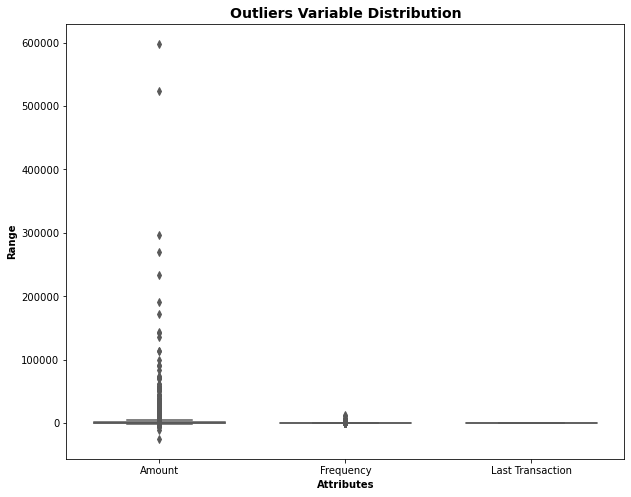

In [19]:
attributes = ['Amount','Frequency','Last Transaction']
plt.rcParams['figure.figsize'] = [10,8]
sns.boxplot(data = cust_details[attributes], orient="v", palette="Set2" ,whis=1.5,saturation=1, width=0.7)
plt.title("Outliers Variable Distribution", fontsize = 14, fontweight = 'bold')
plt.ylabel("Range", fontweight = 'bold')
plt.xlabel("Attributes", fontweight = 'bold')

In [20]:
# Removing outliers for Amount
Q1 = cust_details['Amount'].quantile(0.05)
Q3 = cust_details['Amount'].quantile(0.95)
IQR = Q3 - Q1
cust_details = cust_details[(cust_details['Amount'] >= Q1 - 1.5*IQR) & (cust_details['Amount'] <= Q3 + 1.5*IQR)]

# Removing outliers for Recency
Q1 = cust_details['Last Transaction'].quantile(0.05)
Q3 = cust_details['Last Transaction'].quantile(0.95)
IQR = Q3 - Q1
cust_details = cust_details[(cust_details['Last Transaction'] >= Q1 - 1.5*IQR) & (cust_details['Last Transaction'] <= Q3 + 1.5*IQR)]

# Removing outliers for Frequency
Q1 = cust_details['Frequency'].quantile(0.05)
Q3 = cust_details['Frequency'].quantile(0.95)
IQR = Q3 - Q1
cust_details = cust_details[(cust_details['Frequency'] >= Q1 - 1.5*IQR) & (cust_details['Frequency'] <= Q3 + 1.5*IQR)]

In [21]:
cust_details

,Customer ID,Amount,Frequency,Last Transaction
0,12346.0,-64.68,48,325
1,12347.0,5633.32,253,1
2,12348.0,2019.40,51,74
3,12349.0,4404.54,180,18
4,12350.0,334.40,17,309
...,...,...,...,...
5937,18283.0,2736.65,986,3
5938,18284.0,436.68,29,429
5939,18285.0,427.00,12,660
5940,18286.0,1188.43,70,476


#### Scaling the attributes

In [22]:
scaler = StandardScaler()

In [23]:
scaled = scaler.fit_transform(cust_details[['Amount', 'Frequency', 'Last Transaction']])

In [24]:
scaled = pd.DataFrame(scaled)

In [25]:
scaled.columns = ['Amount', 'Frequency', 'Last Transaction']

In [26]:
scaled

,Amount,Frequency,Last Transaction
0,-0.668571,-0.407287,0.565006
1,1.346911,0.887540,-0.962200
2,0.068605,-0.388338,-0.618107
3,0.912270,0.426455,-0.882069
4,-0.527409,-0.603090,0.489589
...,...,...,...
5826,0.322309,5.517335,-0.952773
5827,-0.491231,-0.527295,1.055221
5828,-0.494655,-0.634671,2.144062
5829,-0.225324,-0.268330,1.276760


### Model Development

#### Elbow Method

<ul>
    <li>Elbow graph helps in selecting the optimal number of clusters by fitting the model with a range of values for K </li> <p>
    <li>If the line chart resembles an arm, then the “elbow” (the point of inflection on the curve) is a good indication that the underlying model fits best at that point.  </li>
</ul>

In [27]:
score=[]
for i in range (2,7):
    kmeans=KMeans (n_clusters=i, max_iter=50, verbose=True).  fit(scaled)
    score.append(kmeans.inertia_)

Initialization complete
Iteration 0, inertia 14999.600965996813
Iteration 1, inertia 11264.327260879974
Iteration 2, inertia 10621.597542366919
Iteration 3, inertia 10403.82052435208
Iteration 4, inertia 10314.177400792936
Iteration 5, inertia 10270.676372049373
Iteration 6, inertia 10250.621932998358
Iteration 7, inertia 10242.545186917401
Iteration 8, inertia 10239.110060633933
Iteration 9, inertia 10238.23456607242
Converged at iteration 9: center shift 7.012010760842852e-05 within tolerance 0.00010000000000000052.
Initialization complete
Iteration 0, inertia 21340.636547953483
Iteration 1, inertia 10767.752882100258
Iteration 2, inertia 10504.567892990175
Iteration 3, inertia 10356.808092460424
Iteration 4, inertia 10280.893940805625
Iteration 5, inertia 10256.729839878397
Iteration 6, inertia 10248.181900857397
Iteration 7, inertia 10243.536624043849
Iteration 8, inertia 10241.2775617897
Iteration 9, inertia 10240.305253649536
Iteration 10, inertia 10239.54354910462
Iteration 11, 

Iteration 12, inertia 5854.639981185911
Iteration 13, inertia 5854.511341731038
Converged at iteration 13: center shift 1.5524775192747415e-05 within tolerance 0.00010000000000000052.
Initialization complete
Iteration 0, inertia 11012.985478015426
Iteration 1, inertia 6050.725782913853
Iteration 2, inertia 5860.251306899379
Iteration 3, inertia 5855.912045992753
Iteration 4, inertia 5854.9075402703875
Iteration 5, inertia 5854.586954517197
Converged at iteration 5: center shift 2.4126137875003358e-05 within tolerance 0.00010000000000000052.
Initialization complete
Iteration 0, inertia 6425.424422607425
Iteration 1, inertia 4813.97876515935
Iteration 2, inertia 4593.584350559785
Iteration 3, inertia 4517.720154681414
Iteration 4, inertia 4475.965012259814
Iteration 5, inertia 4444.368104734049
Iteration 6, inertia 4418.419738210664
Iteration 7, inertia 4402.959931654201
Iteration 8, inertia 4391.878535820256
Iteration 9, inertia 4382.840363253038
Iteration 10, inertia 4378.461302551836


Iteration 24, inertia 3668.3166779140965
Iteration 25, inertia 3667.021445017368
Iteration 26, inertia 3665.28880961614
Iteration 27, inertia 3663.3404212197283
Iteration 28, inertia 3662.798379681299
Iteration 29, inertia 3662.576560031986
Iteration 30, inertia 3662.4017342068328
Converged at iteration 30: center shift 9.22265205416672e-05 within tolerance 0.00010000000000000052.
Initialization complete
Iteration 0, inertia 4437.435598338474
Iteration 1, inertia 3684.552225404505
Iteration 2, inertia 3546.0007327931494
Iteration 3, inertia 3460.419922017354
Iteration 4, inertia 3398.919083723461
Iteration 5, inertia 3360.2699087047017
Iteration 6, inertia 3326.0877539675284
Iteration 7, inertia 3292.0408341452003
Iteration 8, inertia 3259.091527069704
Iteration 9, inertia 3241.326473288878
Iteration 10, inertia 3229.4445790743266
Iteration 11, inertia 3213.4497379084346
Iteration 12, inertia 3193.8979346994715
Iteration 13, inertia 3167.2879876502975
Iteration 14, inertia 3143.5330150

In [28]:
len(score)

5

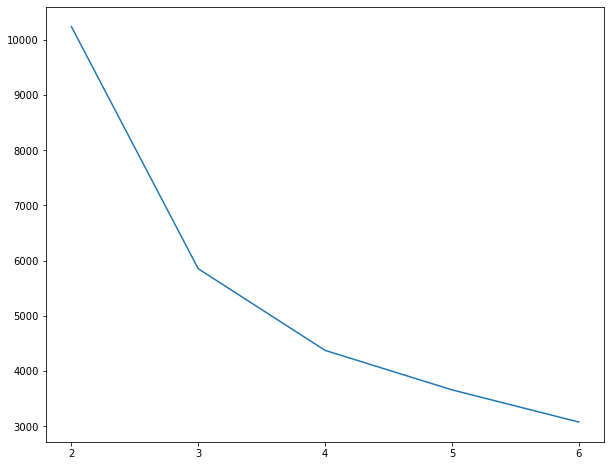

In [29]:
plt.plot(range(2,7,1), score)
plt.xticks(ticks=range(2,7))
plt.show()

#### Calculate Silhouette Score

<ul>
    <li>The silhouette score measures the similarity an object is to its cluster compared to other clusters.</li><p>
    <li>The silhouette ranges from −1 to +1, where a high value indicates that the object is well matched to its cluster and poorly matched to neighboring clusters</li> <p>
    <li>If most objects have a high value, then the clustering configuration is appropriate. If many points have a low or negative value, then the clustering configuration may have too many or too few clusters</li>
</ul>


In [30]:
for i in range (2,7):
    kmeans = KMeans (n_clusters=i, max_iter=50).fit(scaled)
    cluster_labels=kmeans.labels_
    silhouette_avg=silhouette_score(scaled, cluster_labels)
    print('For n_cluster{} the silhouette score is {}'.format(i, silhouette_avg))

For n_cluster2 the silhouette score is 0.5485308609163347
For n_cluster3 the silhouette score is 0.5004991432009669
For n_cluster4 the silhouette score is 0.4957107935941256
For n_cluster5 the silhouette score is 0.48985653459593365
For n_cluster6 the silhouette score is 0.4462478973273721


From the above elbow graphs and silhouette scores, it can be concluded that 3 is the ideal k value for number of clusters.

#### Build final model with k=3

In [31]:
kmeans = KMeans(n_clusters=3, max_iter=50). fit(scaled)
clusters = kmeans.labels_

In [32]:
cust_details['Cluster']=clusters

In [33]:
cust_details

,Customer ID,Amount,Frequency,Last Transaction,Cluster
0,12346.0,-64.68,48,325,2
1,12347.0,5633.32,253,1,1
2,12348.0,2019.40,51,74,0
3,12349.0,4404.54,180,18,0
4,12350.0,334.40,17,309,2
...,...,...,...,...,...
5937,18283.0,2736.65,986,3,1
5938,18284.0,436.68,29,429,2
5939,18285.0,427.00,12,660,2
5940,18286.0,1188.43,70,476,2


### Visualizations

#### Clusters and their amount of money have spent

<AxesSubplot:xlabel='Cluster', ylabel='Amount'>

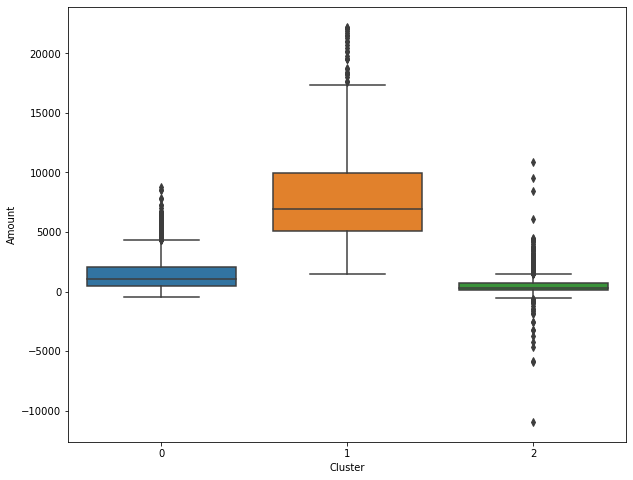

In [34]:
sns.boxplot(x='Cluster', y='Amount', data=cust_details)

#### Clusters and their transaction frequency

<AxesSubplot:xlabel='Cluster', ylabel='Frequency'>

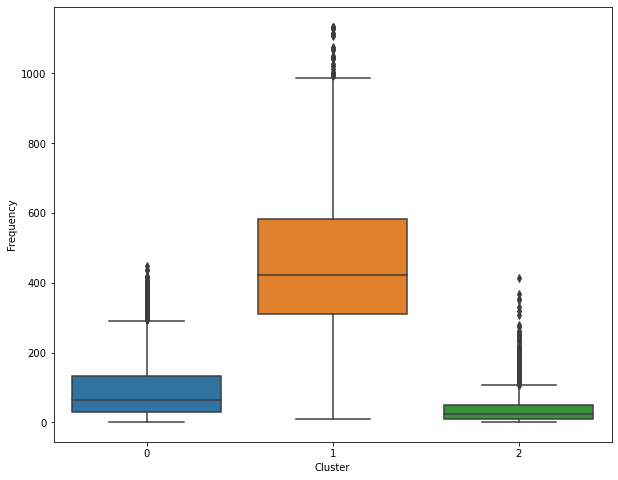

In [35]:
sns.boxplot(x='Cluster', y='Frequency', data=cust_details)

#### Clusters and their last transaction activity

<AxesSubplot:xlabel='Cluster', ylabel='Last Transaction'>

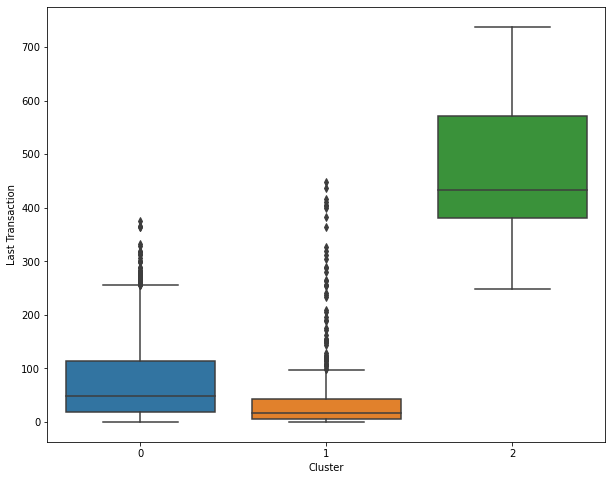

In [36]:
sns.boxplot(x='Cluster', y='Last Transaction', data=cust_details)

### Findings

<ul>
    <li>The are three clusters of customer based on their transaction history</li><p>
    <li>The third cluster is the most promising market because the customers spent the most money and made the most transaction. Furthermore, the low last transaction number of this cluster indicates that the customers in this cluster possibly make another transaction sooner than the others</li> <p>
        <li>The first cluster has pretty similar behaviours to the second cluster. However, this cluster can be concluded as a better cluster since the last transaction indicates that they made more recent transaction than the cluster two</li> <p>
</ul>
